In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split


# Load the dataset
file_path = '/content/drive/MyDrive/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv'
data = pd.read_csv(file_path)

# Display the first few rows and column names
print(data.head())
print(data.columns)
print(len(data.columns))


    Destination Port   Flow Duration   Total Fwd Packets  \
0                389       113095465                  48   
1                389       113473706                  68   
2                  0       119945515                 150   
3                443        60261928                   9   
4                 53             269                   2   

    Total Backward Packets  Total Length of Fwd Packets  \
0                       24                         9668   
1                       40                        11364   
2                        0                            0   
3                        7                         2330   
4                        2                          102   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                         10012                     403   
1                         12718                     403   
2                             0                       0   
3                          4221                 

In [2]:

data.columns = data.columns.str.replace(' ', '')

print(data.columns)


Index(['DestinationPort', 'FlowDuration', 'TotalFwdPackets',
       'TotalBackwardPackets', 'TotalLengthofFwdPackets',
       'TotalLengthofBwdPackets', 'FwdPacketLengthMax', 'FwdPacketLengthMin',
       'FwdPacketLengthMean', 'FwdPacketLengthStd', 'BwdPacketLengthMax',
       'BwdPacketLengthMin', 'BwdPacketLengthMean', 'BwdPacketLengthStd',
       'FlowBytes/s', 'FlowPackets/s', 'FlowIATMean', 'FlowIATStd',
       'FlowIATMax', 'FlowIATMin', 'FwdIATTotal', 'FwdIATMean', 'FwdIATStd',
       'FwdIATMax', 'FwdIATMin', 'BwdIATTotal', 'BwdIATMean', 'BwdIATStd',
       'BwdIATMax', 'BwdIATMin', 'FwdPSHFlags', 'BwdPSHFlags', 'FwdURGFlags',
       'BwdURGFlags', 'FwdHeaderLength', 'BwdHeaderLength', 'FwdPackets/s',
       'BwdPackets/s', 'MinPacketLength', 'MaxPacketLength',
       'PacketLengthMean', 'PacketLengthStd', 'PacketLengthVariance',
       'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount', 'PSHFlagCount',
       'ACKFlagCount', 'URGFlagCount', 'CWEFlagCount', 'ECEFlagCount',
       '

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170366 entries, 0 to 170365
Data columns (total 79 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   DestinationPort          170366 non-null  int64  
 1   FlowDuration             170366 non-null  int64  
 2   TotalFwdPackets          170366 non-null  int64  
 3   TotalBackwardPackets     170366 non-null  int64  
 4   TotalLengthofFwdPackets  170366 non-null  int64  
 5   TotalLengthofBwdPackets  170366 non-null  int64  
 6   FwdPacketLengthMax       170366 non-null  int64  
 7   FwdPacketLengthMin       170366 non-null  int64  
 8   FwdPacketLengthMean      170366 non-null  float64
 9   FwdPacketLengthStd       170366 non-null  float64
 10  BwdPacketLengthMax       170366 non-null  int64  
 11  BwdPacketLengthMin       170366 non-null  int64  
 12  BwdPacketLengthMean      170366 non-null  float64
 13  BwdPacketLengthStd       170366 non-null  float64
 14  Flow

In [4]:
data.Label.nunique()


4

In [5]:

data['Label'] = data['Label'].apply(lambda x: 'ATTACK' if x != 'BENIGN' else x)


In [6]:
data.Label.unique()

array(['BENIGN', 'ATTACK'], dtype=object)

In [7]:
data.Label.value_counts()

BENIGN    168186
ATTACK      2180
Name: Label, dtype: int64

In [8]:
data.head()


,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,...,32,203985.500,5.758373e+05,1629110,379,13800000.0,4.277541e+06,16500000,6737603,BENIGN
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,...,32,178326.875,5.034269e+05,1424245,325,13800000.0,4.229413e+06,16500000,6945512,BENIGN
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,...,0,6909777.333,1.170000e+07,20400000,6,24400000.0,2.430000e+07,60100000,5702188,BENIGN
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702161,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,53,269,2,2,102,322,51,51,51.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [9]:

features = data.drop('Label', axis=1)
labels = data['Label']

In [10]:
features.replace([np.inf, -np.inf], np.nan, inplace=True)
features.dropna(inplace=True)

In [11]:
features = features.select_dtypes(include=[float, int])


In [12]:
len(features)

170231

In [13]:
features

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,act_data_pkt_fwd,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,...,23,32,203985.500,5.758373e+05,1629110,379,13800000.0,4.277541e+06,16500000,6737603
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,...,39,32,178326.875,5.034269e+05,1424245,325,13800000.0,4.229413e+06,16500000,6945512
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,...,0,0,6909777.333,1.170000e+07,20400000,6,24400000.0,2.430000e+07,60100000,5702188
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702161,...,8,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0
4,53,269,2,2,102,322,51,51,51.000000,0.000000,...,1,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170361,55641,49,1,3,6,18,6,6,6.000000,0.000000,...,0,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0
170362,45337,217,2,1,31,6,31,0,15.500000,21.920310,...,0,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0
170363,22,1387547,41,46,2728,6634,456,0,66.536585,110.129945,...,24,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0
170364,22,207,1,1,0,0,0,0,0.000000,0.000000,...,0,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0


In [14]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)

In [16]:
round(data.shape[0]*80/100)-1

136292

In [17]:
missing_labels = np.isnan(y_encoded).sum()
print(f"Number of missing values in y_encoded: {missing_labels}")

Number of missing values in y_encoded: 0


In [18]:
train_size = round(len(y_encoded) * 0.8)

X_train = features_scaled[:train_size]
X_test = features_scaled[train_size:]
y_train = y_encoded[:train_size]
y_test = y_encoded[train_size:]

print(f"Length of X_train: {len(X_train)}")
print(f"Length of y_train: {len(y_train)}")
print(f"Length of X_test: {len(X_test)}")
print(f"Length of y_test: {len(y_test)}")

min_len = min(len(X_test), len(y_test))
X_test = X_test[:min_len]
y_test = y_test[:min_len]

print(f"Final Length of X_test: {len(X_test)}")
print(f"Final Length of y_test: {len(y_test)}")



Length of X_train: 136293
Length of y_train: 136293
Length of X_test: 33938
Length of y_test: 34073
Final Length of X_test: 33938
Final Length of y_test: 33938


In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report

ocsvm = OneClassSVM(kernel='rbf', nu=0.01, gamma='auto')
ocsvm.fit(X_train)

y_pred = ocsvm.predict(X_test)


print("Number of anomalies detected:", (y_pred == -1).sum())




Number of anomalies detected: 581


In [ ]:
from sklearn.metrics import accuracy_score

# Convert One-Class SVM predictions to 0 and 1: -1 for outliers and 1 for inliers
svm_predict = np.where(y_pred == -1, 1, 0)  # Replace -1 with 1 and 1 with 0

# Convert true labels to 0 and 1 as well
y_test_mapped = np.where(y_test == 'ATTACK', 1, 0)  # Replace 'DDoS' with 1 and 'BENIGN' with 0

accuracy = accuracy_score(y_test_mapped, svm_predict)
print("Accuracy in separating Outliers:", accuracy)


Accuracy in separating Outliers: 0.982880546879604


In [ ]:

y_pred = np.array(y_pred)

# Get unique values and their counts
unique_values, counts = np.unique(y_pred, return_counts=True)

for value, count in zip(unique_values, counts):
    print(f'Value: {value}, Count: {count}')


Value: -1, Count: 581
Value: 1, Count: 33357


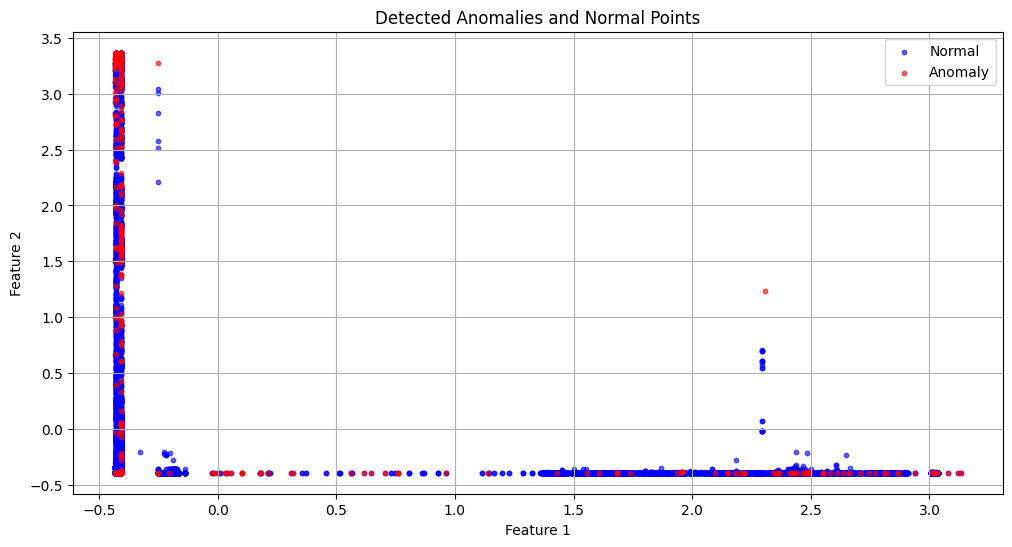

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.scatter(X_test[:, 0][y_pred == 1], X_test[:, 1][y_pred == 1], c='blue', label='Normal', s=10, alpha=0.6)

plt.scatter(X_test[:, 0][y_pred == -1], X_test[:, 1][y_pred == -1], c='red', label='Anomaly', s=10, alpha=0.6)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Detected Anomalies and Normal Points')
plt.legend()
plt.grid(True)
plt.show()


In [19]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
iso_forest.fit(X_train)

y_pred = iso_forest.predict(X_test)

print("Number of anomalies detected:", (y_pred == -1).sum())

iso_forest_predict = np.where(y_pred == -1, 1, 0)

accuracy = accuracy_score(y_test, iso_forest_predict)
print("Accuracy in separating Outliers:", accuracy)

unique_values, counts = np.unique(y_pred, return_counts=True)

for value, count in zip(unique_values, counts):
    print(f'Value: {value}, Count: {count}')


Number of anomalies detected: 291
Accuracy in separating Outliers: 0.008574459308150156
Value: -1, Count: 291
Value: 1, Count: 33647
